In [1]:
#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
#Loading the dataset
df = pd.read_csv('dataset.csv')

In [3]:
#Viewing the first few rows of the dataset
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [4]:
#Set size
df.shape

(500, 5)

In [5]:
#Summary of the set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


___

## Exploratory analysis

This step of the process helps you understand how the data is organized and any potential problems.

In [6]:
#Describing categorical data
df.describe(include=object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [7]:
#Describing numerical data
df.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


### Visualizing the distribution of quantitative variables:

In [8]:
columns_select = list(df.select_dtypes(exclude=['object']))

In [9]:
columns_select

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

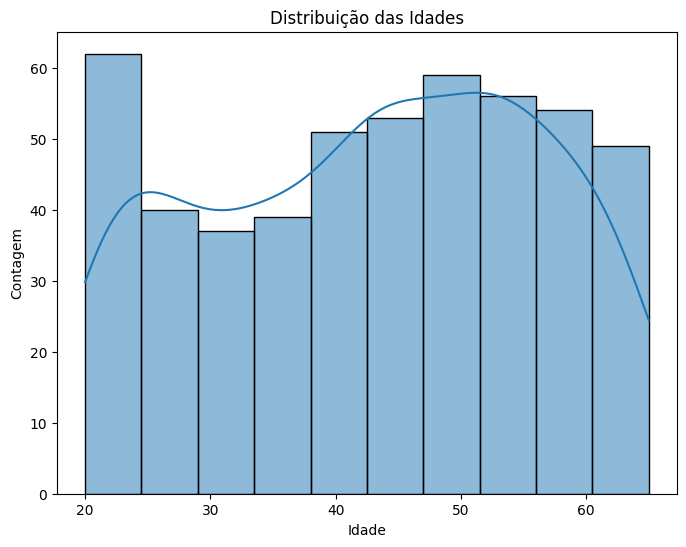

In [10]:
#Age distribution
plt.figure(figsize = (8, 6))
sns.histplot(df['Idade'], kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

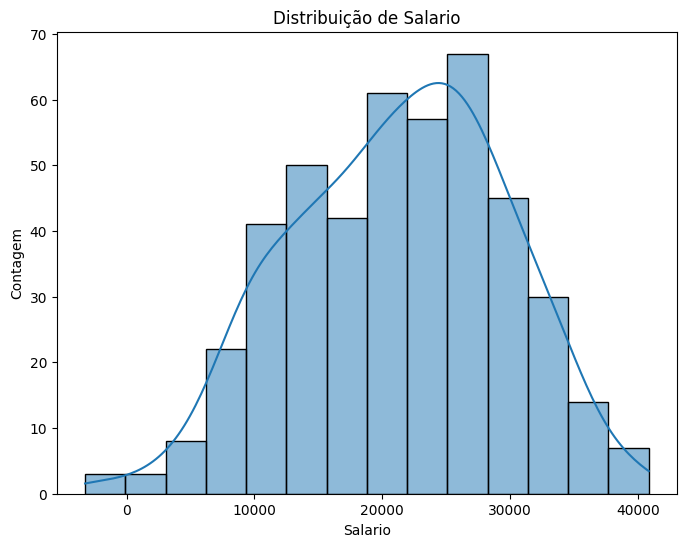

In [11]:
#Salary distribution
plt.figure(figsize = (8, 6))
sns.histplot(df['Salario'], kde=True)
plt.title('Distribuição de Salario')
plt.xlabel('Salario')
plt.ylabel('Contagem')
plt.show()

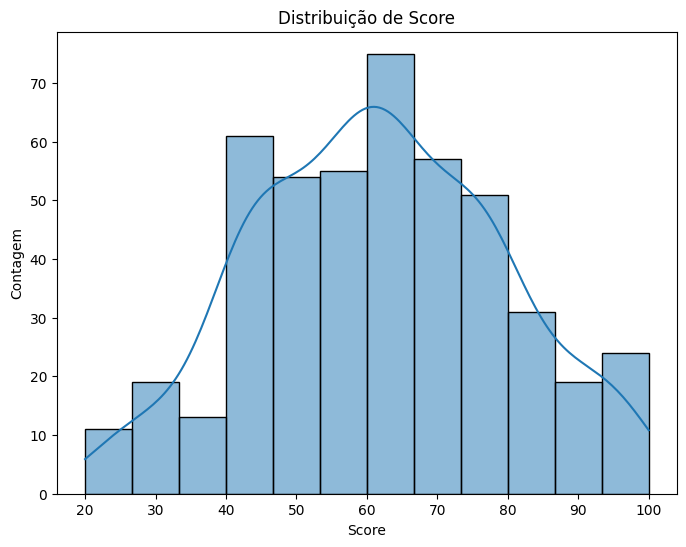

In [12]:
#Score distribution
plt.figure(figsize = (8, 6))
sns.histplot(df['Score_Exame_Psicotecnico'], kde=True)
plt.title('Distribuição de Score')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

### Visualizing the distribution of categorical variables:

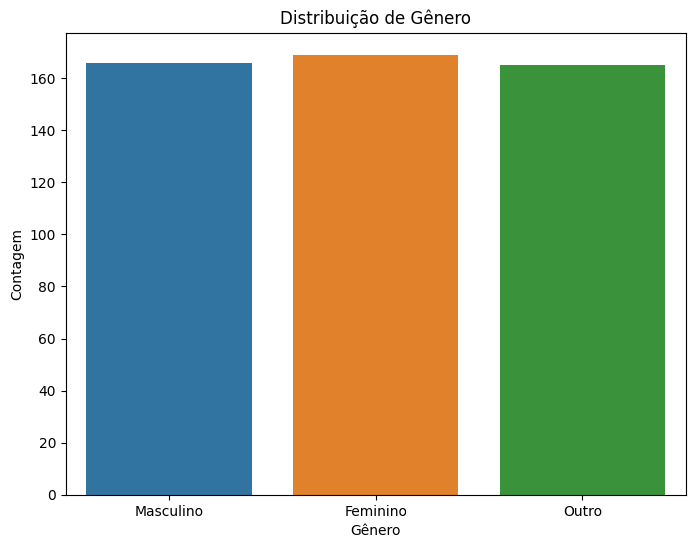

In [13]:
#Gender Distribution
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x='Genero')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

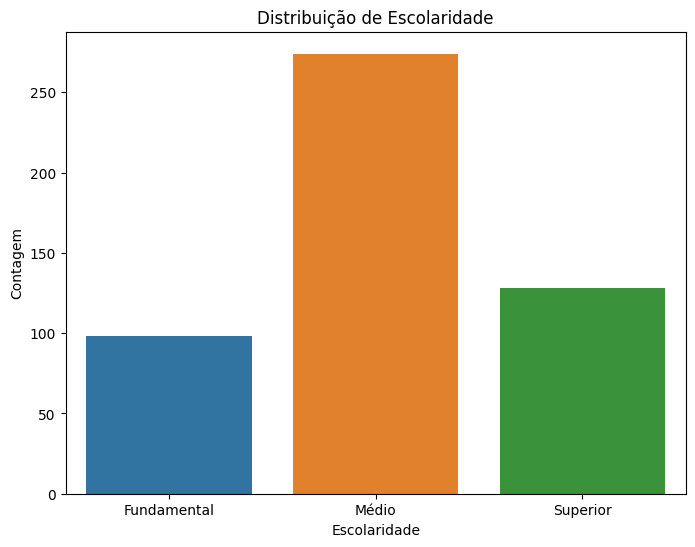

In [14]:
# Distribution of Education
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x='Escolaridade', order=['Fundamental', 'Médio', 'Superior'])
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

___

### Correlation Between Quantitative Variables

The correlation between quantitative variables allows us to understand how one variable moves in relation to another. The most common method for calculating correlation between variables is using the Pearson correlation coefficient, which ranges from -1 to 1.

> **Note: The data must have a normal distribution.**

- The closer to 1, the stronger the positive correlation.
- The closer to -1, the stronger the negative correlation.
- Close to 0 indicates little or no correlation.


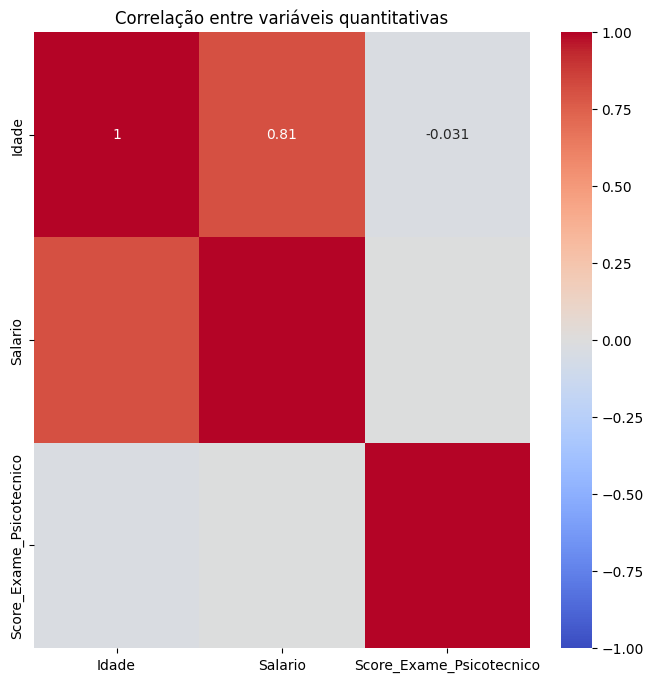

In [15]:
# Calculating the correlation matrix for only quantitative variables
correlation_matrix = df[['Idade', 'Salario', 'Score_Exame_Psicotecnico']].corr()

# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()

___

### Association Between Qualitative Variables

For categorical variables, association (rather than correlation) is used to analyze the relationship between variables.

**Contingency Table**: It is essentially a crosstab that shows the frequency (or count) of observations in each category for two variables.

In [16]:
#Contingency table
contingency_table = pd.crosstab(df['Genero'], df['Escolaridade'])

In [17]:
contingency_table

Escolaridade,Fundamental,Médio,Superior
Genero,,,
Feminino,31,90,48
Masculino,32,95,39
Outro,35,89,41


**Chi-Square Test (χ²)**: It is used to test the independence between two categorical variables.

The Chi-Square Test (chi-square) is a statistical technique used to determine if there is a significant association between two categorical variables in a dataset. There are several hypotheses associated with the chi-square test:

- **Null Hypothesis (H0):** The null hypothesis states that there is no significant association between the two categorical variables in the dataset. In other words, the two variables are independent of each other.

- **Alternative Hypothesis (H1 or Ha):** The alternative hypothesis is the negation of the null hypothesis. It suggests that there is a significant association between the two categorical variables in the dataset. Simply put, the two variables are not independent.

The test is applied and the p-value is analyzed. If the p-value is less than a significance level (usually 0.05), the null hypothesis that the variables are independent can be rejected.

In [18]:
# Applying the chi2_contingency function
chi2, p, _, _ = chi2_contingency(contingency_table)

In [19]:
print(f'Chi-square test p-value: {p:.4f}')

Chi-square test p-value: 0.8300


> In this case we fail to reject H0. The two variables are probably independent of each other.

**Cramér's Contingency Coefficient (V)**: Measures the strength of the association between two nominal variables. Its value ranges from 0 (no association) to 1 (perfect association). It is based on the chi-square value.

In [20]:
#Calculating Cramer's Contingency Coefficient
n = contingency_table.sum().sum()
phi2 = chi2/n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min(r-1, k-1))
print(f'Cramér coefficient V: {cramer_v:.4f}')

Cramér coefficient V: 0.0385


> There is probably no association between the variables.

___

## Data Preprocessing Techniques

So far, I have analyzed and explored the data. I have used the results of this work to decide what type of processing I should perform. I will start by treating missing values, duplicates, and negative values.

### Duplicate values

In [21]:
# I used the duplicated() method to create a series of boolean values indicating duplicates
dupli = df.duplicated()

In [22]:
# Exibe as linhas que estão duplicadas
df[dupli]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


> There are no duplicate lines.

### Negative values

In [23]:
# Checking negative values in the Salary column
df[df['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


> Negative values in the Salary variable will be converted to missing values and then I will handle missing values.

In [24]:
# Replacing negative values with NaN (missing values)
df['Salario'] = df['Salario'].apply(lambda x: x if x >= 0 else None)

In [25]:
# Checking negative values in the Salary column
df[df['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


> Set without missing values.

### Missing values

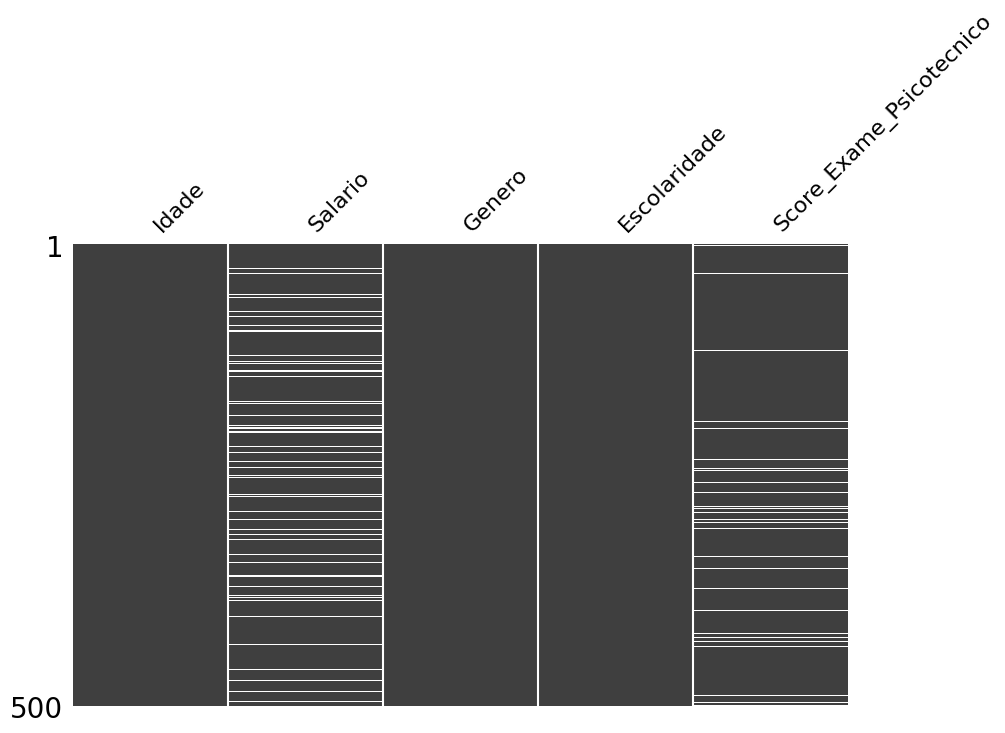

In [26]:
# Missing values map
msno.matrix(df, figsize = (10, 6), sparkline = False)
plt.show()

In this graph, the presence of data is represented by dark bars and missing values are represented by blank spaces. The right side of the graph provides a bar chart indicating the total amount of values present for each variable.

In [27]:
# Using isna() method to check for missing values in each column
df.isna().sum()

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64

In [28]:
# Calculate the percentage of missing values in each column
(df.isna().mean() * 100).round(2)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64

### Missing Value Handling Strategies

When you have a variable with missing values, such as in this case where the variable "salary" has 10% missing values, there are several strategies you can consider to deal with these missing values. The choice of strategy depends on the context of your data and the purpose of your analysis. Some common strategies include:

**Removing rows**: You can choose to remove the rows that contain missing values in the "salary" column. This is appropriate if the amount of missing data is small relative to the total size of the data set and if removing them will not introduce bias into your results. However, this strategy can lead to loss of information.

**Filling with a default value**: Depending on the context, you can choose to fill in the missing values with a default value, such as the mean, median, or a specific value. This may be appropriate if you believe that the missing values are not critical and that a default value will not significantly affect the analysis.

**Filling from other variables**: Sometimes you can use information from other variables in the dataset to fill in missing values for “salary.” For example, you could fill in the average salary of people with the same education level or gender.

**Predictive model**: If the “salary” variable is important and the missing values cannot be easily filled in with averages or standard values, you can create a predictive model to estimate the missing values based on other relevant variables. This is more complex, but can be a powerful approach if you have enough data and the “salary” variable is critical to your analysis.

### Normality Test to Decide on the Missing Value Treatment Strategy

To fill in missing values with the mean, we must check whether the variable follows a normal distribution. If the variable follows a normal distribution, the mean or the median can be used. Otherwise, the median should be used.

In [29]:
#Extracting salary column in a series
salario = df['Salario']

#Shapiro-wilk test
stat, p_value = stats.shapiro(salario)

#Printing the test result
print(f'Test statistic: {stat}')
print(f'p-value: {p_value}')

#Checking the null hypothesis with p-value
alfa = 0.05 #Significance level
if p_value > alfa:
    print('There is no evidence to reject the null hypothesis (the data appear to follow a normal distribution).')
else:
    print('The null hypothesis is rejected (the data does not follow a normal distribution).')


Test statistic: nan
p-value: 1.0
There is no evidence to reject the null hypothesis (the data appear to follow a normal distribution).


> I can then use the mean and fill in the missing values. This technique is called imputation.

### Imputation for Treatment of Missing Values

Treating the Salario variable

In [30]:
# Calculating the mean of the variable "Salario" (ignoring missing values)
mean_salary = df['Salario'].mean()

In [31]:
#Filling missing values with the mean
df['Salario'].fillna(mean_salary, inplace=True)

In [32]:
#Checking
df.isna().sum()

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64

The Score variable

In [33]:
#Extracting Score column in a series
score_exam = df['Score_Exame_Psicotecnico']

#Shapiro-wilk test
stat, p_value = stats.shapiro(score_exam)

#Printing the test result
print(f'Test statistic: {stat}')
print(f'p-value: {p_value}')

#Checking the null hypothesis with p-value
alfa = 0.05 #Significance level
if p_value > alfa:
    print('There is no evidence to reject the null hypothesis (the data appear to follow a normal distribution).')
else:
    print('The null hypothesis is rejected (the data does not follow a normal distribution).')


Test statistic: nan
p-value: 1.0
There is no evidence to reject the null hypothesis (the data appear to follow a normal distribution).


> I can then use the mean and fill in the missing values. This technique is called imputation.

In [34]:
# Calculating the mean of the variable "Score" (ignoring missing values)
mean_score = df['Score_Exame_Psicotecnico'].mean()

In [35]:
#Filling missing values with the mean
df['Score_Exame_Psicotecnico'].fillna(mean_score, inplace=True)

In [36]:
df.isna().sum()

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64

> I saw that there is a correlation between Age and Salary. But if I change the Age variable to Age_Range, is this relationship confirmed?

### Statistical Test of Relationship Between Quantitative and Qualitative Variables

In [37]:
#Defining stationary ranges in ascending order:
age_ranges = [0, 25, 35, 45, 55, float('inf')]

In [38]:
#Defining labels for age groups:
labels_age = ['Under 25', '25-34', '35-44', '45-54', '55 ou mais']

In [39]:
#Using the cut function to create the age_range variable:
df['faixa_etaria'] = pd.cut(df['Idade'], bins=age_ranges, labels=labels_age)

In [40]:
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,faixa_etaria
0,58,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,48,20886.502401,Feminino,Médio,61.565957,45-54
2,34,15959.388748,Masculino,Médio,57.000000,25-34
3,62,28534.995327,Outro,Superior,68.000000,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.000000,25-34


In [41]:
# Using the drop() method to remove the "Idade" variable
df.drop(columns='Idade', axis=1, inplace=True)

In [42]:
# Rounding the columns "Salario" and "Score_Exame_Psicotecnico" to integers
df['Salario'] = df['Salario'].round().astype(int)
df['Score_Exame_Psicotecnico'] = df['Score_Exame_Psicotecnico'].round().astype(int)

In [43]:
df.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,faixa_etaria
0,30405,Masculino,Médio,56,55 ou mais
1,20887,Feminino,Médio,62,45-54
2,15959,Masculino,Médio,57,25-34
3,28535,Outro,Superior,68,55 ou mais
4,10553,Outro,Fundamental,44,25-34


In [44]:
# Average salary by age group
mean_salary = df.groupby('faixa_etaria')['Salario'].mean()
mean_salary

faixa_etaria
Under 25      13108.633803
25-34         14945.184783
35-44         20980.654545
45-54         24736.491935
55 ou mais    29364.359223
Name: Salario, dtype: float64

In [45]:
# Median salary by age group
median_salary = df.groupby('faixa_etaria')['Salario'].median()
median_salary

faixa_etaria
Under 25      12433.0
25-34         15387.5
35-44         21411.0
45-54         24283.0
55 ou mais    29345.0
Name: Salario, dtype: float64

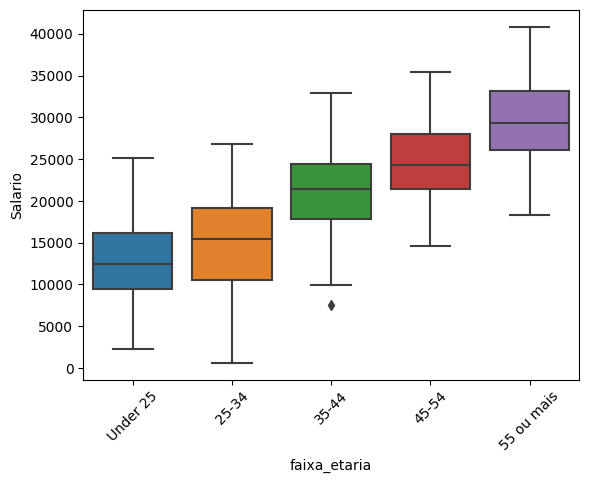

In [46]:
#Boxplots
sns.boxplot(x = 'faixa_etaria', y = 'Salario', data = df)
plt.xticks(rotation = 45)
plt.show()

In [47]:
#ANOVA test
result_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in df.groupby('faixa_etaria')])

#Checking the test result
if result_anova.pvalue < 0.05:
    print('There is evidence of significant differences in average wages between age groups')
else:
    print('There is no evidence of significant differences in average wages between age groups')

There is evidence of significant differences in average wages between age groups


> Yes, the relationship really exists between Idade and Salario.

### Final Report

Based on the analysis, it is possible to observe that:

- The Salary variable presented negative values. Since I do not have more details about this, I decided to convert it from a negative value to a missing value.
- The Salary and Score_Exame_Psicotecnico variables presented missing values problems.
- I treated the missing values by imputing the mean, since both variables follow a normal distribution.
- I identified that there is no relationship between the gender and education variables, that is, they are independent.
- I verified that there is a relationship between age and salary, regardless of the individual value of age or age group.
- The conclusions and decisions were based on statistical tests.